In [2]:
from libsvm.python.libsvm.svmutil import *
import numpy as np
import matplotlib.pyplot as plt
import random 
import math

*
optimization finished, #iter = 855
nu = 0.331038
obj = -11.024148, rho = 0.928165
nSV = 1530, nBSV = 1408
Total nSV = 1530
*
optimization finished, #iter = 896
nu = 0.159846
obj = -57.839835, rho = 0.865833
nSV = 941, nBSV = 583
Total nSV = 941
.*
optimization finished, #iter = 1494
nu = 0.095814
obj = -340.554857, rho = 0.723978
nSV = 808, nBSV = 309
Total nSV = 808
..*.*
optimization finished, #iter = 3028
nu = 0.053486
obj = -1674.064450, rho = 0.670259
nSV = 757, nBSV = 124
Total nSV = 757
....*..*
optimization finished, #iter = 6573
nu = 0.016486
obj = -3742.729727, rho = 0.469364
nSV = 748, nBSV = 6
Total nSV = 748
[0.3853173244921469, 2.591892823175701, 19.64234830781482, 139.06922233617254, 575.7006111430316]


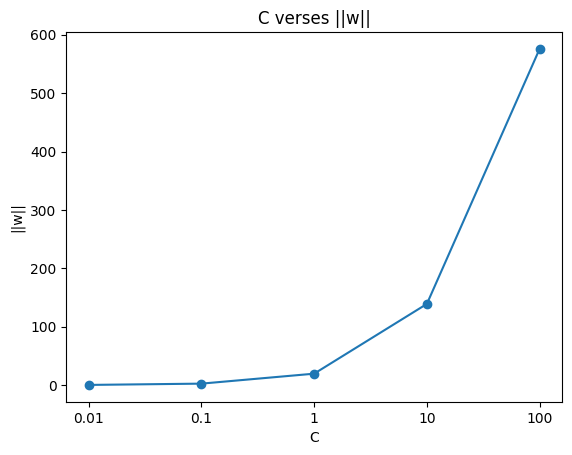

In [4]:
def kernel(x1, x2):
    all_keys = set(range(1, 37))
    for key in all_keys:
        x1[key] = x1.get(key, 0) - x2.get(key, 0)

    norm_squared = np.linalg.norm(list(x1.values()))**2
    return math.exp(-norm_squared)

# ... (rest of your code)

    
def w_sigma(alpha, x):
    N = len(alpha)
    total = 0
    for n in range(N):
        for m in range(N):
            total += alpha[n][0]*alpha[m][0]*kernel(x[n], x[m])
            
    return total
    
y, x = svm_read_problem('train.txt')
y = [-1 if label != 3 else 1 for label in y]
C = [0.01, 0.1, 1, 10, 100]
prob = svm_problem(y, x)
w_values = []
for c in C:
    param = svm_parameter(f'-t 2 -c {c} -g 1')
    model = svm_train(prob, param)
    
    alphas, SVs = model.get_sv_coef(), model.get_SV()
    
    w = w_sigma(alphas, SVs)
    w_values.append(np.sqrt(w))

print(w_values)
c_str = ['0.01', '0.1', '1', '10', '100']
plt.plot(c_str, w_values, marker='o', linestyle='-')
plt.xlabel('C')
plt.ylabel('||w||')
plt.title('C verses ||w||')
plt.show()

In [11]:
def getEval(C, seed):
    y, x = svm_read_problem('train.txt')
    gamma = 1

    for i in range(len(y)):
        if y[i] == 1:
            y[i] = 1
        else:
            y[i] = -1
    
    #  randomly samples 200 examples from the training set for validation and leaves the other examples for training
    random.seed(seed)
    val = random.sample(range(len(y)), 200)
    train = [i for i in range(len(y)) if i not in val]
    
    y_val = [y[i] for i in val]
    x_val = [x[i] for i in val]
    y_train = [y[i] for i in train]
    x_train = [x[i] for i in train]

    m = svm_train(y_train, x_train, f'-t 2 -g {gamma} -c {C} -q')
    p_label, p_acc, p_val = svm_predict(y_val, x_val, m)
    print(C,p_acc[0])
    return 1-p_acc[0]/100

C = [0.0001, 0.001, 0.01, 0.1, 1]
C_count = {0.0001:0, 0.001:0, 0.01:0, 0.1:0, 1:0}

# a = getEval(1, 2)
for i in range(10):
    # find the best C for each seed
    bestC = 0.0001
    bestEval = 1000000
    for c in C:
        eval = getEval(c, i)
        if eval < bestEval:
            bestEval = eval
            bestC = c
    print(f"seed = {i}, bestC = {bestC}, bestEval = {bestEval}")
    C_count[bestC] += 1

Accuracy = 73% (146/200) (classification)
0.0001 73.0
Accuracy = 73% (146/200) (classification)
0.001 73.0
Accuracy = 95% (190/200) (classification)
0.01 95.0
Accuracy = 98.5% (197/200) (classification)
0.1 98.5
Accuracy = 99.5% (199/200) (classification)
1 99.5
seed = 0, bestC = 1, bestEval = 0.0050000000000000044
Accuracy = 75% (150/200) (classification)
0.0001 75.0
Accuracy = 75% (150/200) (classification)
0.001 75.0
Accuracy = 97.5% (195/200) (classification)
0.01 97.5
Accuracy = 99.5% (199/200) (classification)
0.1 99.5
Accuracy = 99.5% (199/200) (classification)
1 99.5
seed = 1, bestC = 0.1, bestEval = 0.0050000000000000044
Accuracy = 75% (150/200) (classification)
0.0001 75.0
Accuracy = 75% (150/200) (classification)
0.001 75.0
Accuracy = 92% (184/200) (classification)
0.01 92.0
Accuracy = 97% (194/200) (classification)
0.1 97.0
Accuracy = 98% (196/200) (classification)
1 98.0
seed = 2, bestC = 1, bestEval = 0.020000000000000018
Accuracy = 76.5% (153/200) (classification)
0.0001